In [1]:
'''
This Python code is an implementation of the Hilbert Modulus Current Space Vector, HMCSV and Hilbert Phase Current Space Vector , HPCSV
using real three phase current for the analysis. 

'''

import matplotlib.pyplot as plt
#import plotly.plotly as py
import numpy as np
import pandas as pd
import math as mt
#from scipy.signal import find_peaks
from scipy.signal import hilbert, chirp


In [2]:
# Reading file from local machine

df=pd.read_excel("C:\\Users\\Hanta_Ayele\\Desktop\\PythonProjects\\combined.xlsx",sheet_name='Sheet1') # reading excel file from local ...need to change the path 
df.head()

######## voltage waveforms #########
V1wf=df["VARead"]
V2wf=df["VBRead"]
V3wf=df["VCRead"]

###### Current waveforms ###########
I1wf=df["U1IARead"]
I2wf=df["U1IBRead"]
I3wf=df["U1ICRead"]

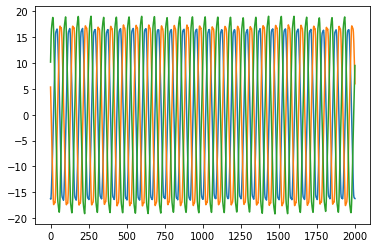

In [3]:
###### Plotting Current Waveforms (2000 points) visualaize the data ##################
plt.plot(I1wf[0:2000])
plt.plot(I2wf[0:2000])
plt.plot(I3wf[0:2000])
plt.show()

In [4]:
##############Calculating fft current and voltage just to check data ##########

Fs = 5000.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector
ff = 60;   # frequency of the signal
V1wf=df["VARead"]
I1wf=df["U1IARead"]

n = len(V1wf) # length of the signal...
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq =frq[range(int(n/2))]# one side frequency range

Y = np.fft.fft(V1wf)/n # fft voltage computing and normalization
Z= np.fft.fft(I1wf)/n # fft computing and normalization

#Y = Y[range(int(n/2))]
Y = Y[range(int(n/2))]
Z=Z[range(int(n/2))]

In [5]:
###### DQ Analysis, this is the two dimentional representation of the three phase current relative to the stator frame#####################
def dq0_transform(I1wf,I2wf,I3wf):
    d=(np.sqrt(2/3)*I1wf-(1/(np.sqrt(6)))*I2wf-(1/(np.sqrt(6)))*I3wf)
    q=((1/(np.sqrt(2)))*I2wf-(1/(np.sqrt(2)))*I3wf)
    return d, q


dqc = dq0_transform(I1wf,I2wf,I3wf)
dqv = dq0_transform(V1wf,V2wf,V3wf)

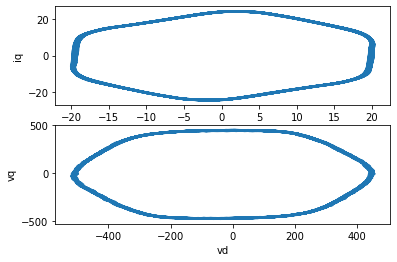

In [6]:
#plot dq for visualization

fig, ax = plt.subplots(2,1)
ax[0].plot(dqc[0], dqc[1])
ax[0].set_xlabel('id')
ax[0].set_ylabel('iq')
ax[1].plot(dqv[0], dqv[1]) # plotting the spectrum
ax[1].set_xlabel('vd')
ax[1].set_ylabel('vq')
plt.show()

In [7]:
################################################## Current and Voltage EPVA###############
# EPVA is extended parks vector approach, a signnal processing technique

dqmc=np.sqrt(np.array(dqc[0])**2+np.array(dqc[1])**2)
dqmv=np.sqrt(np.array(dqv[0])**2+np.array(dqv[1])**2)

n = len(dqmc) # length of the signal...2000
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq =frq[range(int(n/2))]# one side frequency range


DQmc = np.fft.fft(dqmc)/n # fft current computing and normalization
DQmv = np.fft.fft(dqmv)/n # fft current computing and normalization


#Y = Y[range(int(n/2))]
DQmc = DQmc[range(int(n/2))]
DQmv = DQmv[range(int(n/2))]

In [8]:
#############################################  Analytic Signals Phase and Amplitude Demodulation  #################################################

I1wf=df["U1IARead"]     # ia
I2wf=df["U1IBRead"]     # ib
I3wf=df["U1ICRead"]     # ic

V1wf=df["VARead"]      # va
V2wf=df["VBRead"]      # vb
V3wf=df["VCRead"]      # vc

# I1wf = I1wf - np.mean(I1wf)
# I2wf = I2wf - np.mean(I2wf)
# I3wf = I3wf - np.mean(I3wf)
'''
Step 1 Hilbert TransfomTransforms
I did separately but you can write a function that takes three phases at the same time 
You need only the amplitude envelope and nstantaneous phase out puts from all the three phase current inputs

'''
analytic_signal1=hilbert(I1wf)##### we checked last time there is C# library for Hilbert Transform
amplitude_envelope1 = np.abs(analytic_signal1)                                  # Aa   amplitude envelope phase ia
instantaneous_phase1 = np.unwrap(np.angle(analytic_signal1))                    # pa  phase instantaneous phase ia
instantaneous_frequency1 = (np.diff(instantaneous_phase1) /(2.0*np.pi) * Fs)    # frequency instantaneous phase ia u don need this one for this particular case


In [9]:
###### Phase ib ######

analytic_signal2=hilbert(I2wf)
amplitude_envelope2 = np.abs(analytic_signal2)
instantaneous_phase2 = np.unwrap(np.angle(analytic_signal2))
instantaneous_frequency2 = (np.diff(instantaneous_phase2) /(2.0*np.pi) * Fs)

##### Phase ic ######

analytic_signal3=hilbert(I3wf)
amplitude_envelope3 = np.abs(analytic_signal3)
instantaneous_phase3 = np.unwrap(np.angle(analytic_signal3))
instantaneous_frequency3 = (np.diff(instantaneous_phase3) /(2.0*np.pi) * Fs)

In [10]:
''' Step 2 & 3 DQ Transform of both the amplitude and phase  
and modulus calculation of both the amplitude and phase

'''
def dq0_transform(I1wf,I2wf,I3wf):
    d=(np.sqrt(2/3)*I1wf-(1/(np.sqrt(6)))*I2wf-(1/(np.sqrt(6)))*I3wf)
    q=((1/(np.sqrt(2)))*I2wf-(1/(np.sqrt(2)))*I3wf)
    return d, q


dqa = dq0_transform(amplitude_envelope1,amplitude_envelope2,amplitude_envelope3)        # Amplitude dq Transform
dqam=np.sqrt(np.array(dqa[0])**2+np.array(dqa[1])**2)                                  # Sqrt(Ad^2 + Aq^2 ) , modulus 

dqp = dq0_transform(instantaneous_phase1,instantaneous_phase2,instantaneous_phase3)   # Phase dq Transform
dqpm=np.sqrt(np.array(dqp[0])**2+np.array(dqp[1])**2)                                 #  Sqrt(Ap^2 + Ap^2 ), modulus



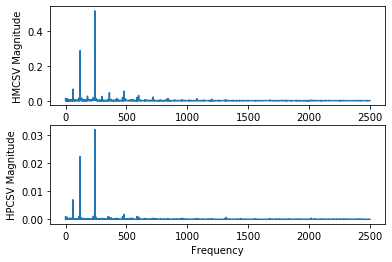

In [11]:
''' Step 4 FFT of the madulated signals amplitude and phase magnitudes HMCSV and HPCSV 

'''
DQafft = np.fft.fft(dqam)/n # fft current computing and normalization,  Hilbert Modulus Current Space Vector, HMCSV
DQpfft = np.fft.fft(dqpm)/n # fft current computing and normalization, Hilbert Phase Current Space Vector , HPCSV

DQafft = DQafft[range(int(n/2))]
DQpfft=DQpfft[range(int(n/2))]
DQafft[0]=0 # replace the DC value to zero or substract the mean value
DQpfft[0]=0 # replace the DC value to zero or substract the mean value
fig, ax = plt.subplots(2,1)
ax[0].plot(frq,2*abs(DQafft))
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('HMCSV Magnitude')
ax[1].plot(frq,2*abs(DQpfft)) # plotting the spectrum
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('HPCSV Magnitude')
plt.show()
